In [47]:
import matplotlib.pyplot as plt
import numpy
from skimage import color
import math
import numpy as np
from scipy import signal
from matplotlib.pyplot import figure

# **Task-a**

(-0.5, 511.5, 511.5, -0.5)

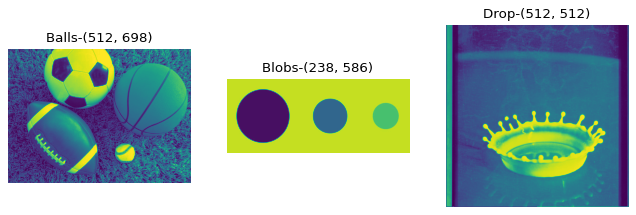

In [48]:
img1=plt.imread('/content/Balls.tif')
img1 = color.rgb2gray(img1)
img2=plt.imread('/content/Blobs.tif')
img2 = color.rgb2gray(img2)
img3=plt.imread('/content/Drop.tif')
img3 = color.rgb2gray(img3)
figure(figsize=(10, 10), dpi=80)
plt.subplot(1,3,1);plt.imshow(numpy.real(img1));plt.title('Balls-'+str(img1.shape));plt.axis('off')
plt.subplot(1,3,2);plt.imshow(numpy.real(img2));plt.title('Blobs-'+str(img2.shape));plt.axis('off')
plt.subplot(1,3,3);plt.imshow(numpy.real(img3));plt.title('Drop-'+str(img3.shape));plt.axis('off') 



In [49]:
def getKernals(sigma1,sigma2):
    m=np.ceil(6*sigma2).astype(int)
    mu_x,mu_y=m//2,m//2
    k1=np.zeros([m,m])
    k2=np.zeros([m,m])
    for x in range(m):
        for y in range(m):
              x1=(x-mu_x)**2+(y-mu_y)**2
              Num1=np.exp(-x1/(2*sigma1**2))
              Den1=(2*np.pi*(sigma1**2))
              k1[x,y]=Num1/Den1
              
              x2=(x-mu_x)**2+(y-mu_y)**2
              Num2=np.exp(-x2/(2*sigma2**2))
              Den2=(2*np.pi*(sigma2**2))
              k2[x,y]=Num2/Den2
    return k1,k2

In [50]:
sigma1=2.5
sigma2=2.5*np.sqrt(2)
k1,k2=getKernals(sigma1,sigma2)
DOG=k1-k2

(-0.5, 21.5, 21.5, -0.5)

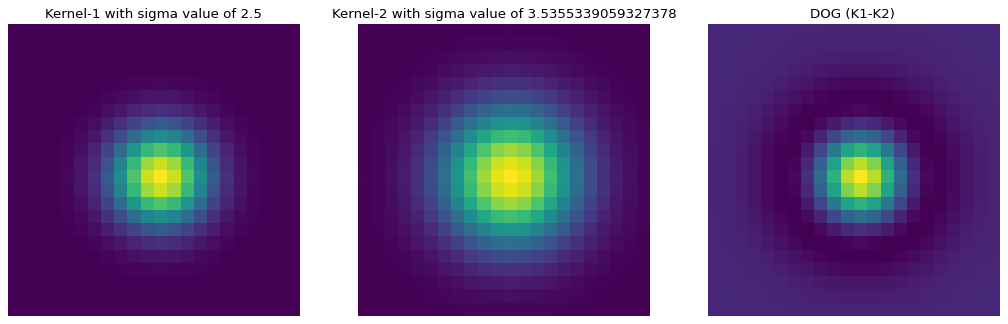

In [51]:
figure(figsize=(16, 12), dpi=80)
plt.subplot(1,3,1);plt.imshow(k1);plt.title('Kernel-1 with sigma value of '+str(sigma1));plt.axis('off')
plt.subplot(1,3,2);plt.imshow(k2);plt.title('Kernel-2 with sigma value of '+str(sigma2));plt.axis('off')
plt.subplot(1,3,3);plt.imshow(k1-k2);plt.title('DOG (K1-K2) ');plt.axis('off') 

In [52]:
print('Kernel-1 shape is :',k1.shape)
print('Kernel-2 shape is : ',k2.shape)
print('DOG shape is :',DOG.shape)

Kernel-1 shape is : (22, 22)
Kernel-2 shape is :  (22, 22)
DOG shape is : (22, 22)


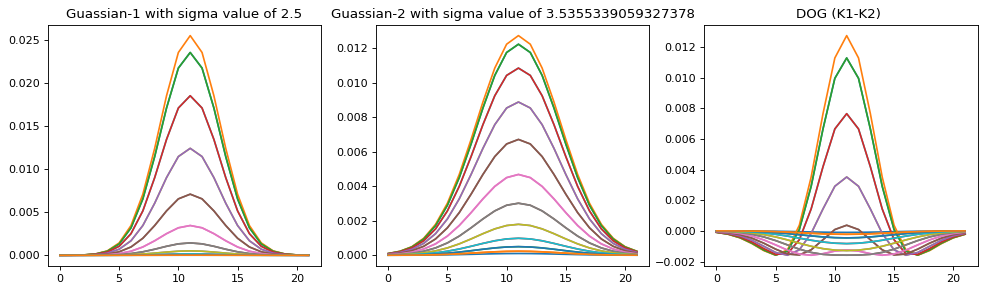

In [53]:
figure(figsize=(15, 4), dpi=80)
plt.subplot(1,3,1);plt.plot(k1);plt.title('Guassian-1 with sigma value of '+str(sigma1));
plt.subplot(1,3,2);plt.plot(k2);plt.title('Guassian-2 with sigma value of '+str(sigma2));
plt.subplot(1,3,3);plt.plot(k1-k2);plt.title('DOG (K1-K2) ');

# **Task-b**

In [54]:
def getDog(R1,G1,B1,R2,G2,B2):
    R=abs(R1-R2)
    G=abs(G1-G2)
    B=abs(B1-B2)
    return abs(R+G+B)

In [55]:
def getdifferenceOfGaussian(Image,k1,k2):
     R=np.zeros(Image.shape[0]*Image.shape[1])
     G=np.zeros(Image.shape[0]*Image.shape[1])
     B=np.zeros(Image.shape[0]*Image.shape[1])
     R=Image[:,:,0]
     G=Image[:,:,1]
     B=Image[:,:,2]
     
     R1=signal.convolve2d(R, k1, boundary='symm', mode='same')
     G1=signal.convolve2d(G, k1, boundary='symm', mode='same')
     B1=signal.convolve2d(B, k1, boundary='symm', mode='same')

     R2=signal.convolve2d(R, k2, boundary='symm', mode='same')
     G2=signal.convolve2d(G, k2, boundary='symm', mode='same')
     B2=signal.convolve2d(B, k2, boundary='symm', mode='same')

     DOG=getDog(R1,G1,B1,R2,G2,B2)

     return np.dstack((R1,G1,B1)),np.dstack((R2,G2,B2)),DOG

In [56]:
def figureplot(Image,I1,I2,DOG,S1,S2,m):
        figure(figsize=(18, 18), dpi=80)
        plt.subplot(1,4,1);plt.imshow((Image/(Image.max())*255).astype('uint8'));plt.title('RGB-original');
        plt.subplot(1,4,2);plt.imshow((I1/(I1.max())*255).astype('uint8'));plt.title('K1-sigma value -'+str(S1)+str(' Kernel Size ')+str(m));
        plt.subplot(1,4,3);plt.imshow((I2/(I2.max())*255).astype('uint8'));plt.title('K2-sigma value -'+str(S2)+str(' Kernel Size ')+str(m));
        plt.subplot(1,4,4);plt.imshow((DOG/(DOG.max())*255).astype('uint8'));plt.title('DOG -'+str(' Kernel Size ')+str(m));  

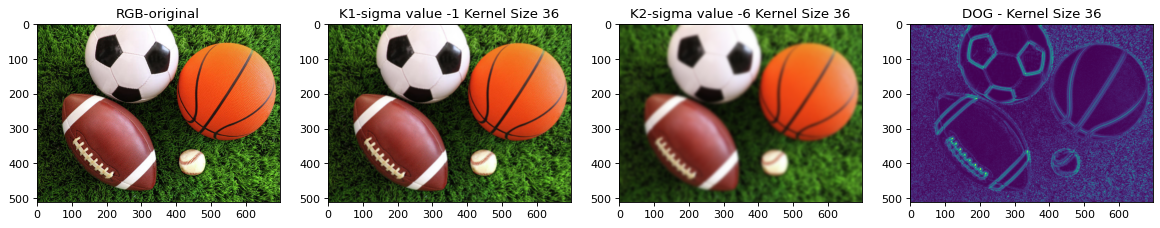

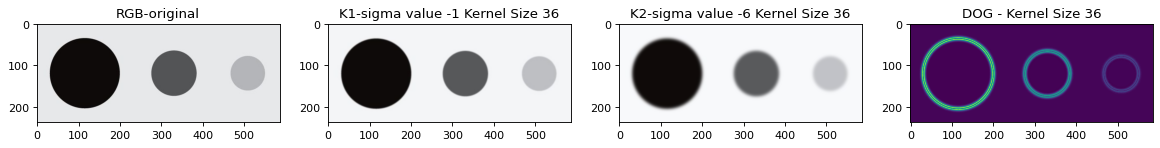

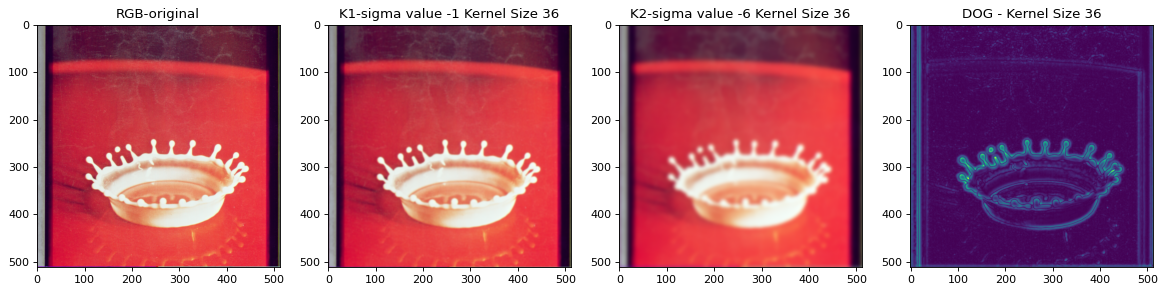

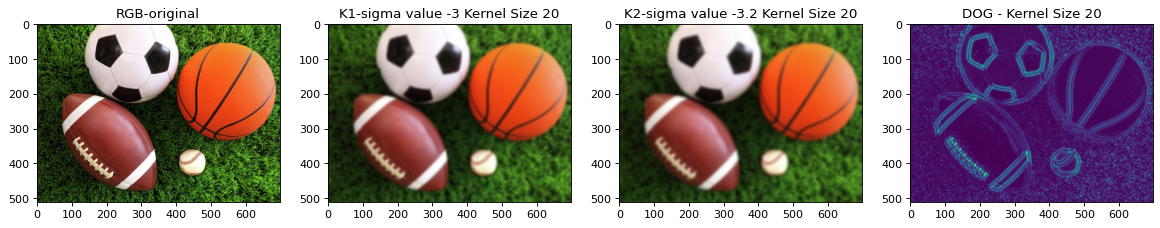

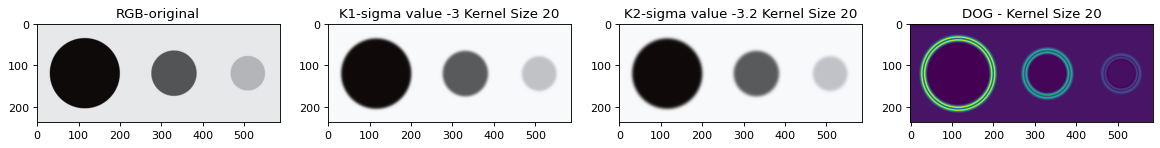

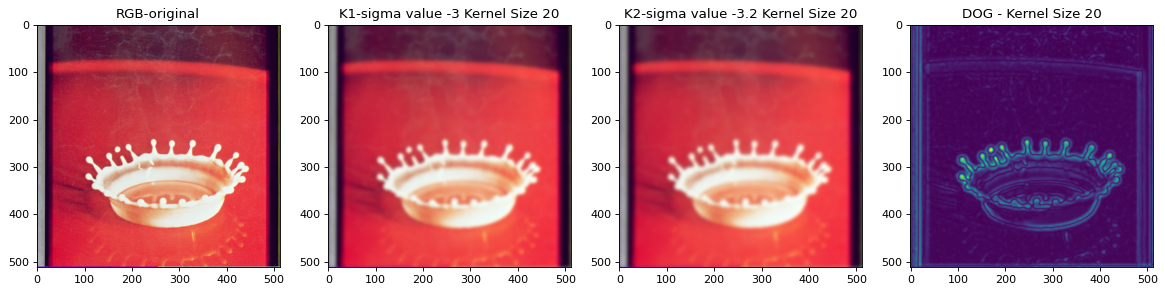

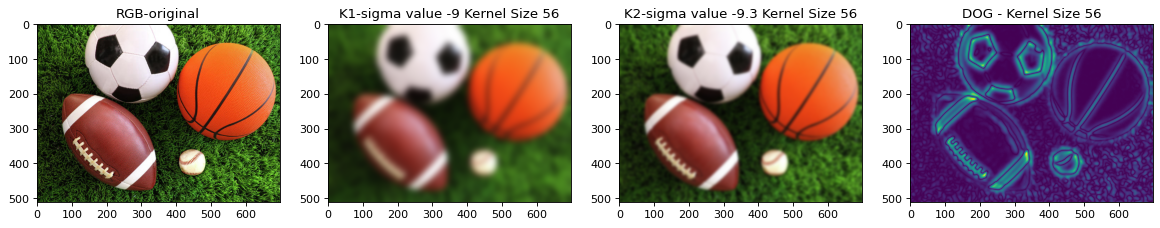

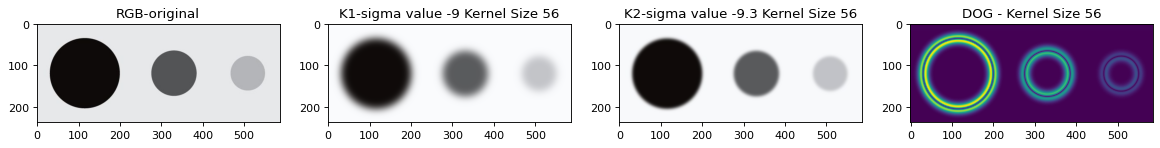

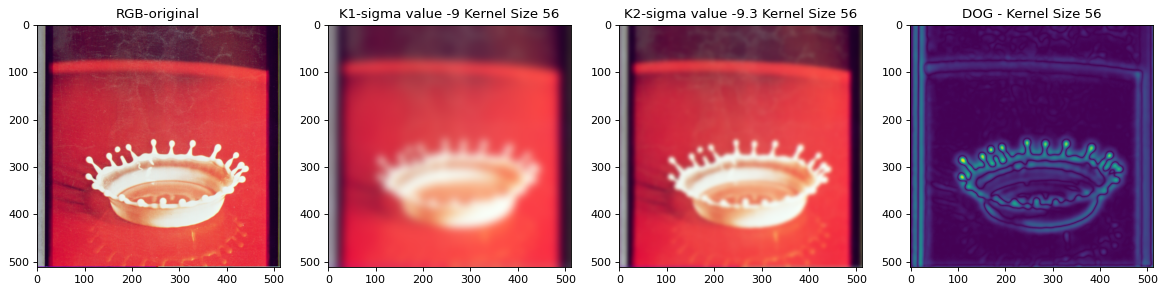

In [57]:
li=['/content/Balls.tif','/content/Blobs.tif','/content/Drop.tif',]
sigValues=[1,6,3,3.2,9,9.3]
i=0
while len(sigValues)>i:
    for ele in li:
        Image=plt.imread(ele)
        m=np.ceil(6*sigValues[i+1]).astype(int)
        k1,K2=getKernals(sigValues[i],sigValues[i+1])
        I1,I2,DOG=getdifferenceOfGaussian(Image,k1,k2)
        figureplot(Image,I1,I2,DOG,sigValues[i],sigValues[i+1],m)
    i=i+2